   # Crop Yield Analysis in India
   This notebook explores crop yield data in India, aiming to analyze factors affecting yield and provide recommendations for farmers.

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mlxtend.frequent_patterns import apriori, association_rules

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Load the crop yield data
data = pd.read_csv('../docs/crop_yield.csv')

In [15]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

# Display information about the dataset
print("\nDataset Information:")
data.info()

# Check for missing values
print("\nMissing Values Count:")
print(data.isnull().sum())

# Calculate basic statistics for numerical columns
print("\nBasic Statistics:")
display(data.describe())

# Count unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in ['Crop', 'Season', 'State']:
    print(f"{col}: {data[col].nunique()} unique values")
    
# Display the top 10 most common crops
print("\nTop 10 Most Common Crops:")
display(data['Crop'].value_counts().head(10))

# Display the top 5 states with the most records
print("\nTop 5 States with Most Records:")
display(data['State'].value_counts().head(5))

First 5 rows of the dataset:


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB

Missing Values Count:
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

Basic St

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000



Unique Values in Categorical Columns:
Crop: 55 unique values
Season: 6 unique values
State: 30 unique values

Top 10 Most Common Crops:


Crop
Rice                 1197
Maize                 975
Moong(Green Gram)     740
Urad                  733
Groundnut             725
Sesamum               685
Potato                628
Sugarcane             605
Wheat                 545
Rapeseed &Mustard     528
Name: count, dtype: int64


Top 5 States with Most Records:


State
Karnataka         1432
Andhra Pradesh    1266
West Bengal       1094
Chhattisgarh       915
Bihar              896
Name: count, dtype: int64

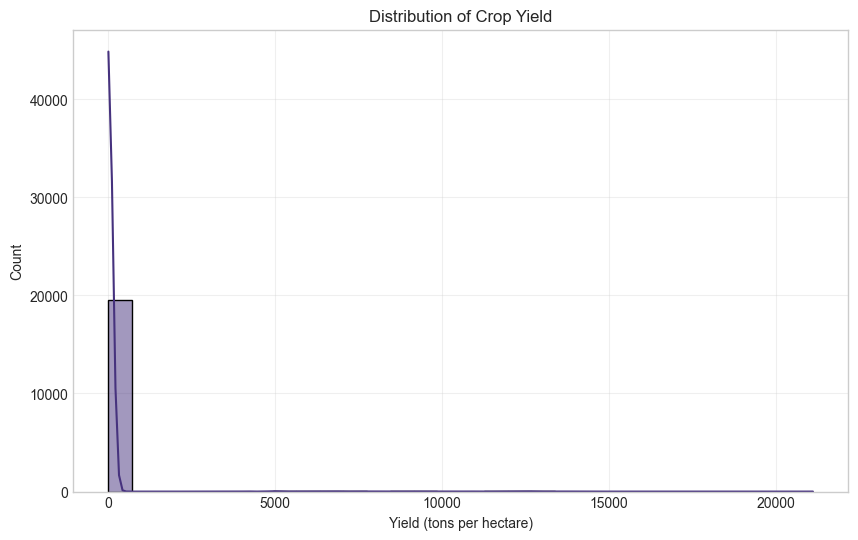

In [26]:
# Visualize distribution of yield with 10 bins
plt.figure(figsize=(10, 6))
sns.histplot(data['Yield'], bins=30, kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield (tons per hectare)')
plt.grid(True, alpha=0.3)
plt.show()

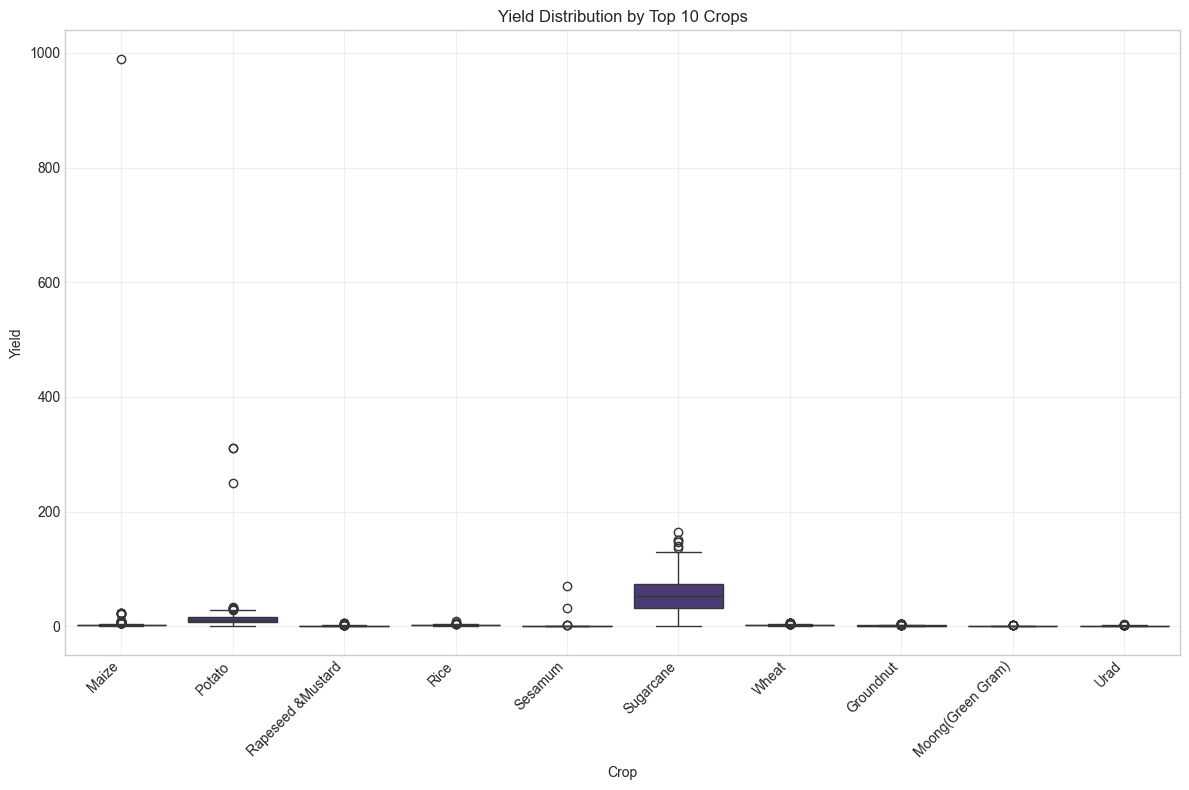

In [18]:
# Boxplot of yield by top 10 crops
top_10_crops = data['Crop'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crop', y='Yield', data=data[data['Crop'].isin(top_10_crops)])
plt.title('Yield Distribution by Top 10 Crops')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

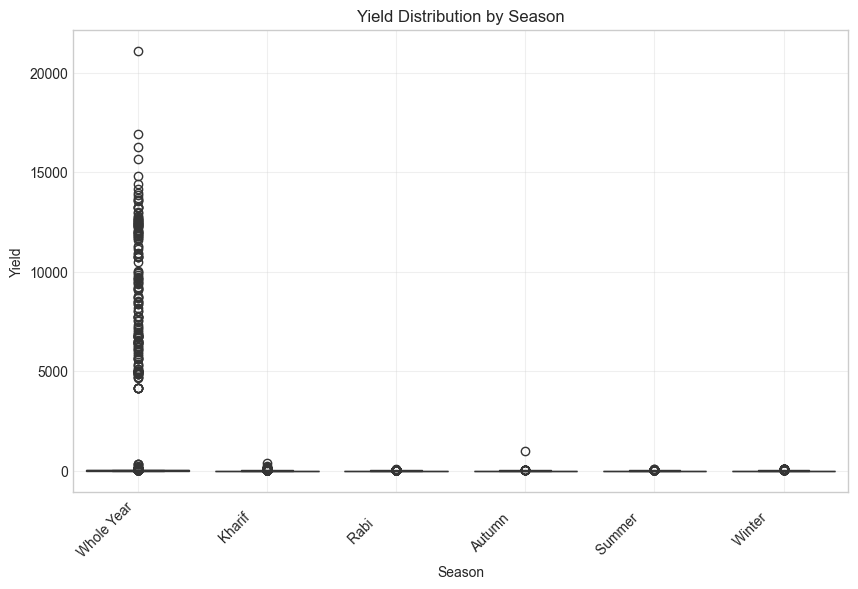

In [19]:
# Boxplot of yield by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Yield', data=data)
plt.title('Yield Distribution by Season')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.show()

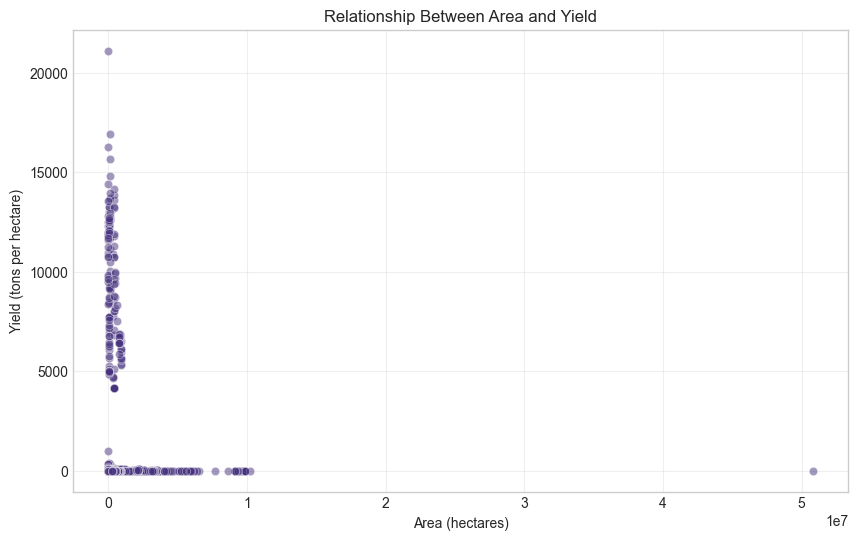

In [20]:
# Scatter plot of area vs. yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Yield', data=data, alpha=0.5)
plt.title('Relationship Between Area and Yield')
plt.xlabel('Area (hectares)')
plt.ylabel('Yield (tons per hectare)')
plt.grid(True, alpha=0.3)
plt.show()

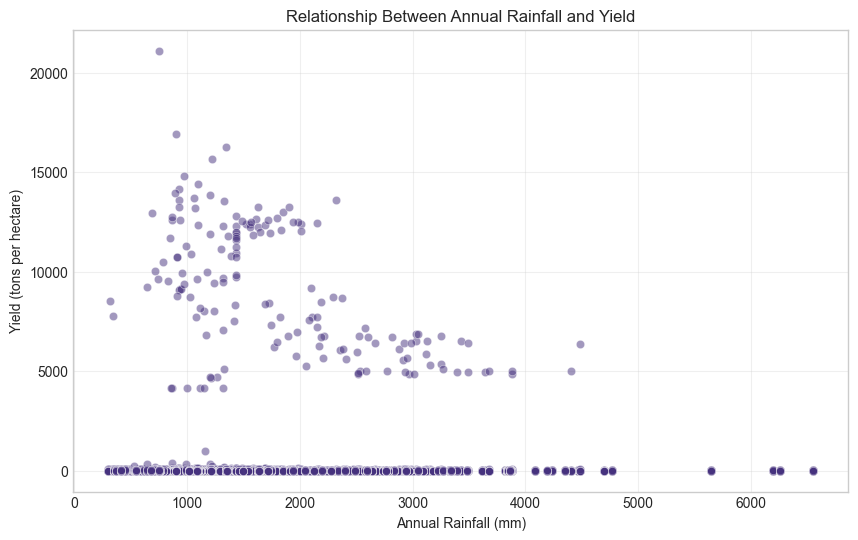

In [22]:
# Scatter plot of rainfall vs. yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Rainfall', y='Yield', data=data, alpha=0.5)
plt.title('Relationship Between Annual Rainfall and Yield')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Yield (tons per hectare)')
plt.grid(True, alpha=0.3)
plt.show()

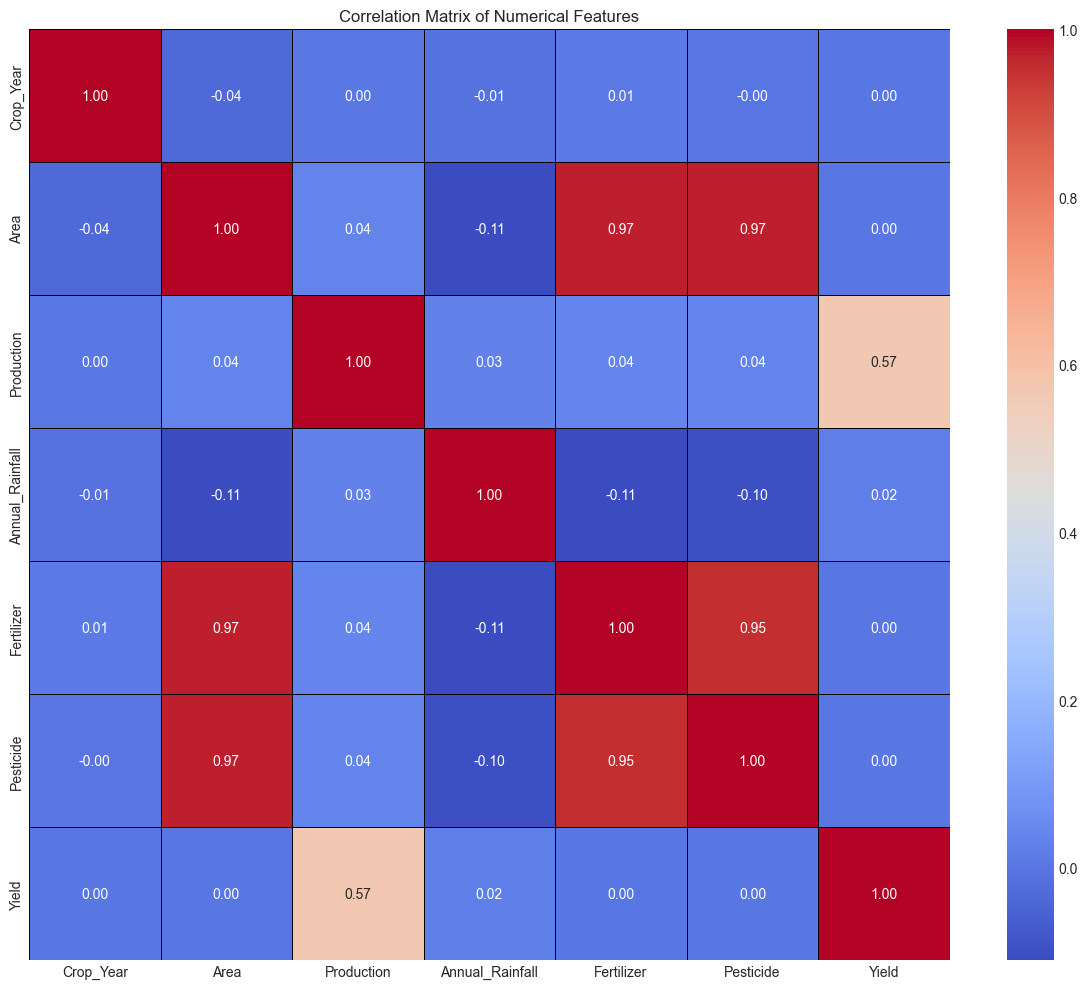

In [27]:
# Calculate correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()



Features Correlation with Yield:
Yield              1.000000
Production         0.570809
Annual_Rainfall    0.020761
Fertilizer         0.002862
Crop_Year          0.002539
Area               0.001858
Pesticide          0.001782
Name: Yield, dtype: float64


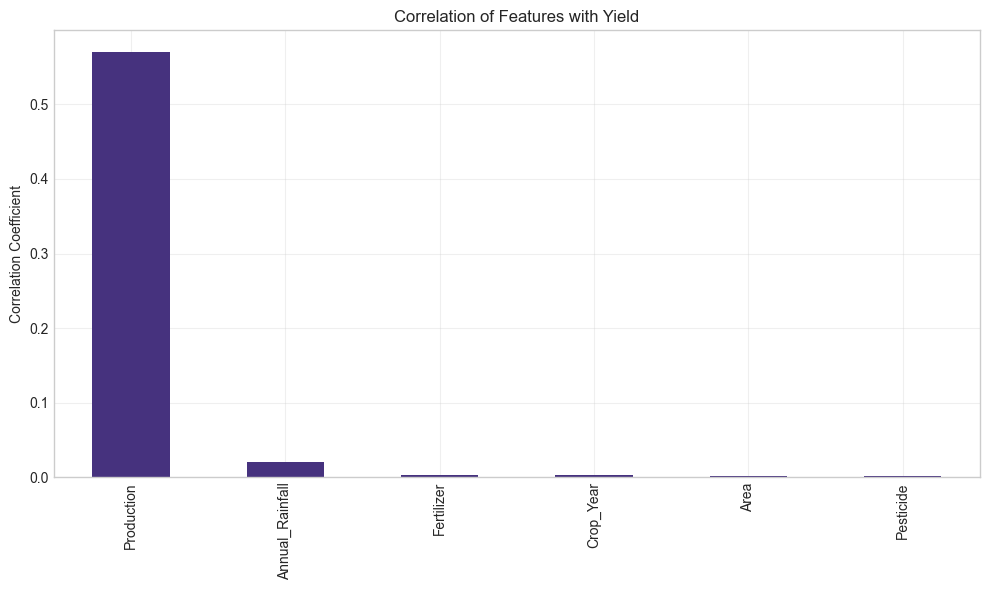

In [28]:
# Extract correlations with yield
yield_correlations = correlation_matrix['Yield'].sort_values(ascending=False)
print("\nFeatures Correlation with Yield:")
print(yield_correlations)

# Visualize the correlations with yield
plt.figure(figsize=(10, 6))
yield_correlations.drop('Yield').plot(kind='bar')
plt.title('Correlation of Features with Yield')
plt.ylabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

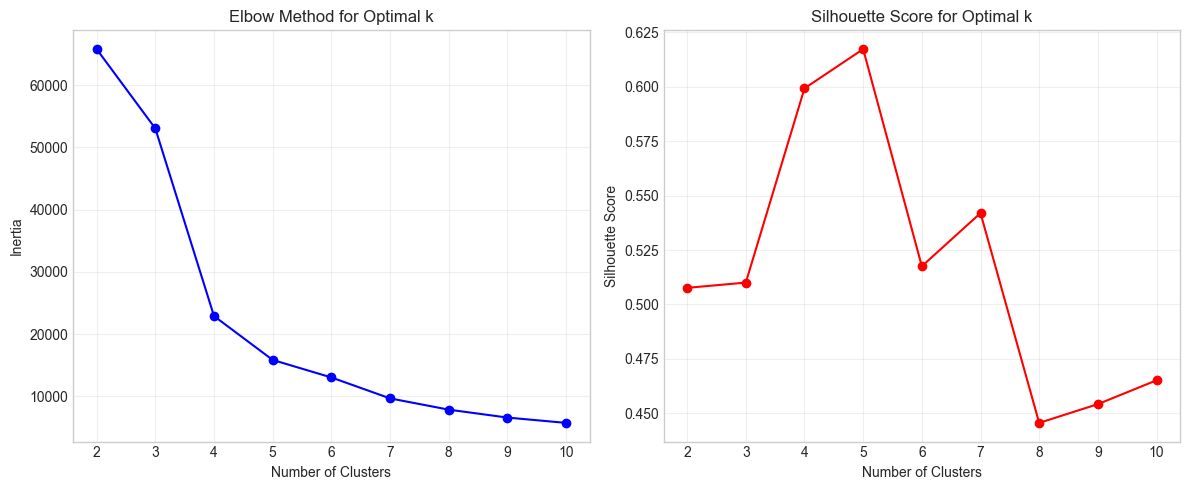


Cluster Characteristics:


,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield
Cluster,,,,,
0,3.661831e+06,1019.821768,5.026495e+08,1.011617e+06,3.916256
1,2.839014e+04,2911.807169,3.682701e+06,7.638002e+03,115.849695
2,5.080810e+07,1852.900000,4.835407e+09,1.575051e+07,0.698889
3,1.124281e+05,1154.787906,1.487912e+07,2.994065e+04,74.858168


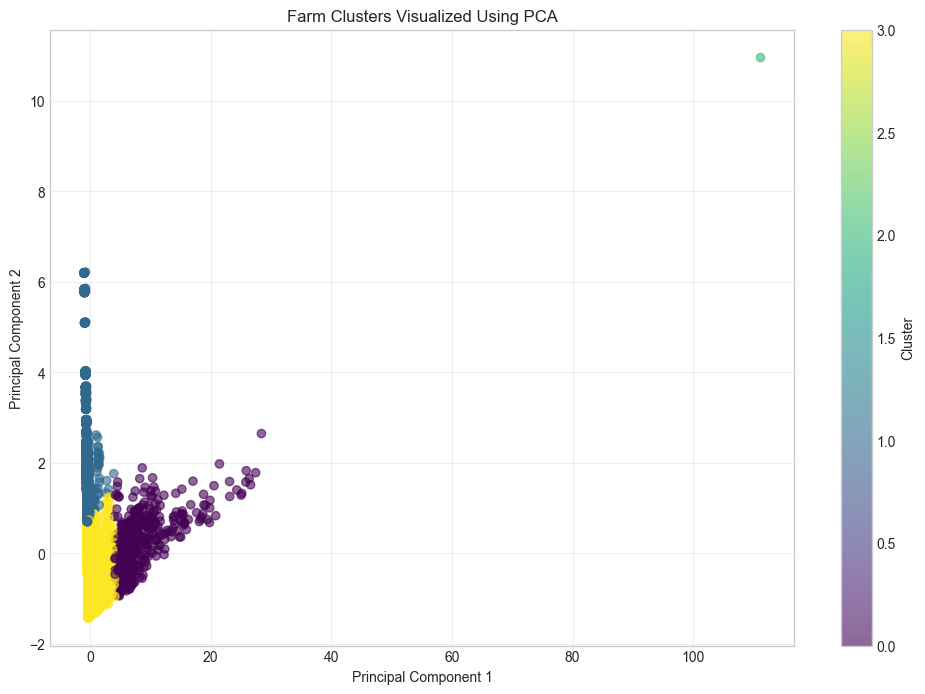

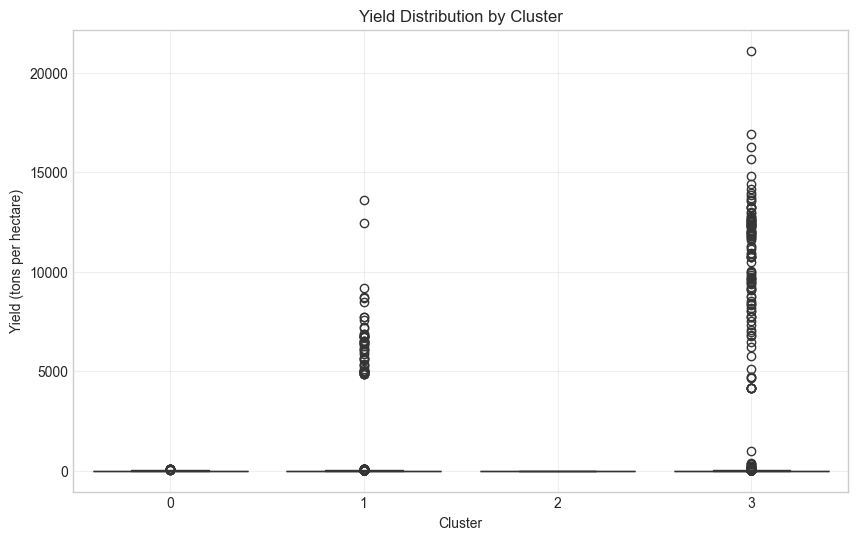

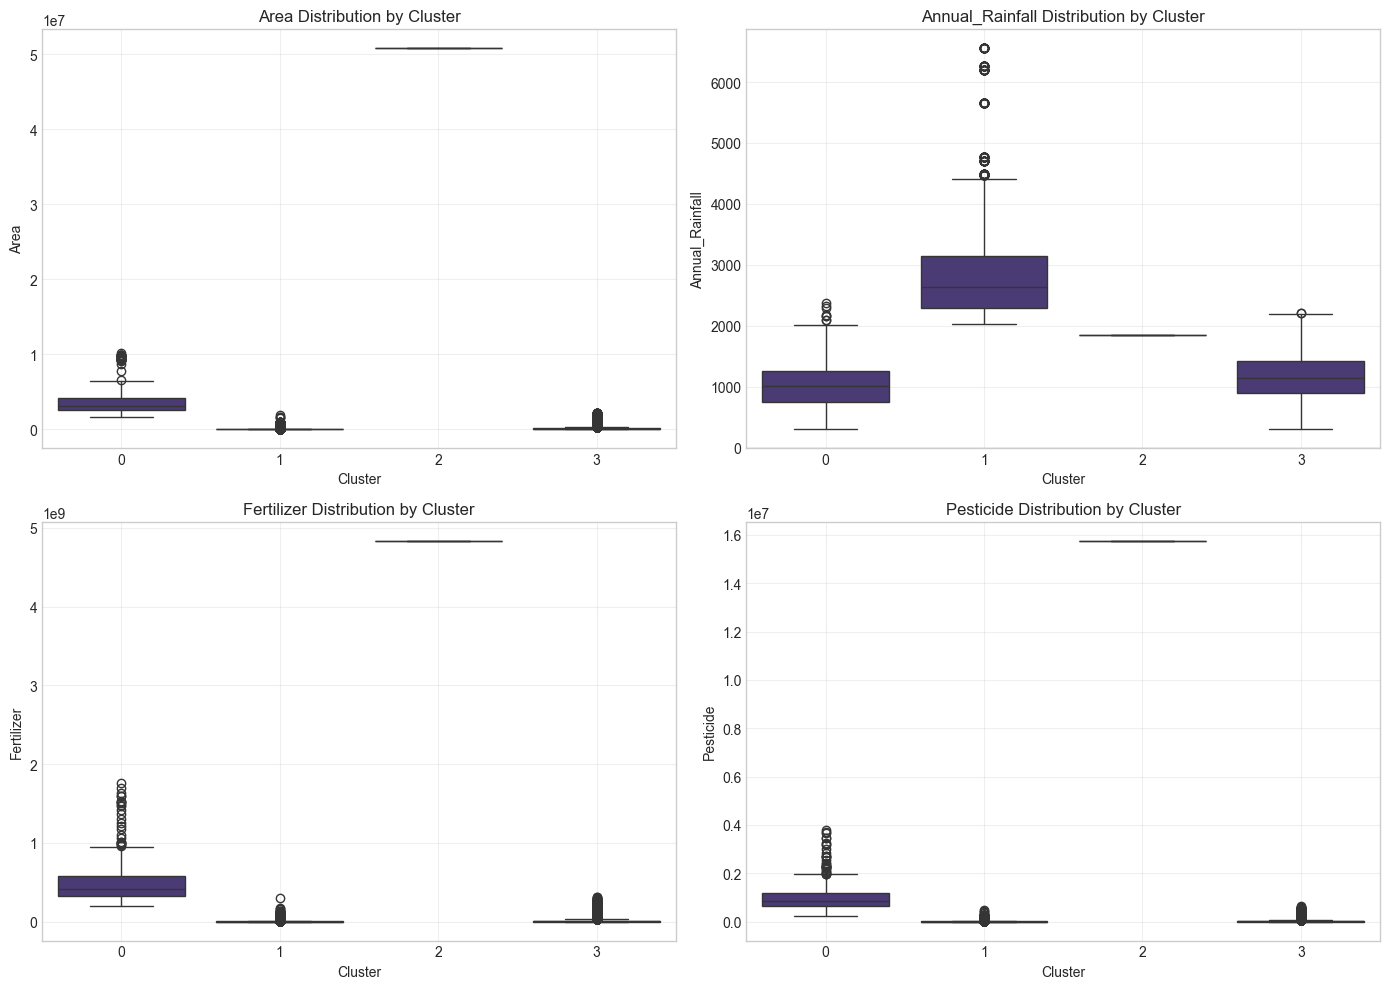

In [29]:
# Select features for clustering
cluster_features = ['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
X = data[cluster_features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Choose optimal number of clusters (e.g., 4)
optimal_k = 4  # This should be chosen based on the elbow plot and silhouette scores
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
cluster_stats = data.groupby('Cluster')[cluster_features + ['Yield']].mean()
print("\nCluster Characteristics:")
display(cluster_stats)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Farm Clusters Visualized Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

# Box plots to compare yield across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Yield', data=data)
plt.title('Yield Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Yield (tons per hectare)')
plt.grid(True, alpha=0.3)
plt.show()

# Compare other features across clusters
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(cluster_features):
    sns.boxplot(x='Cluster', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

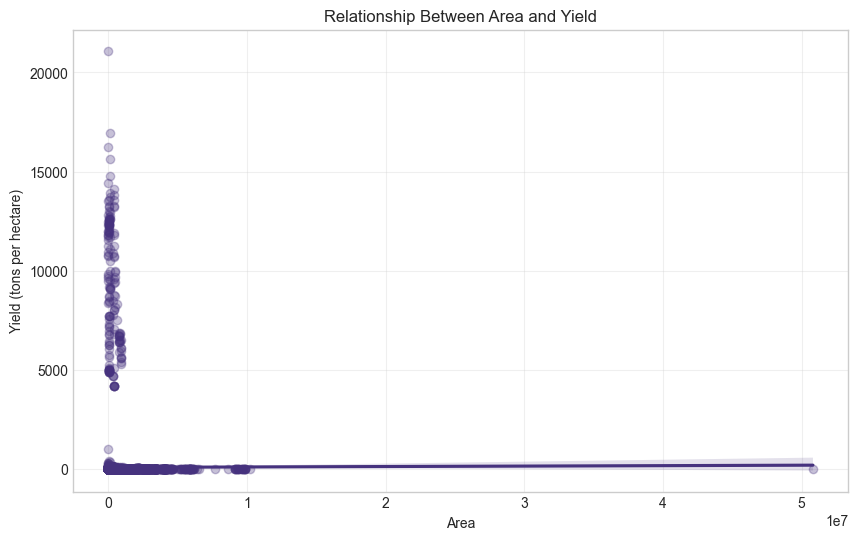

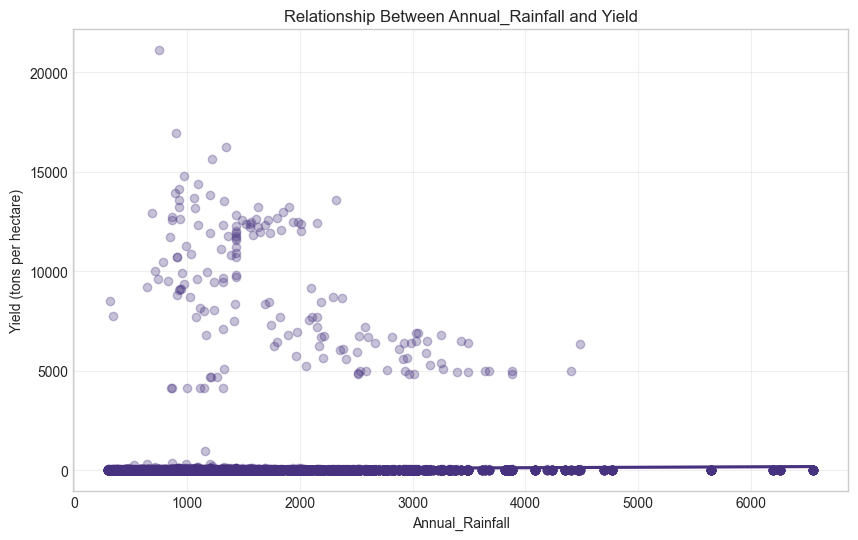

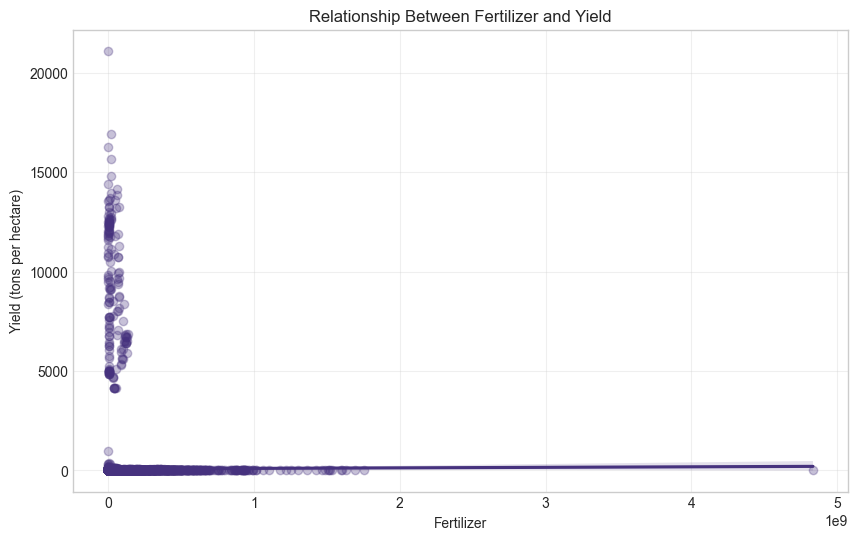

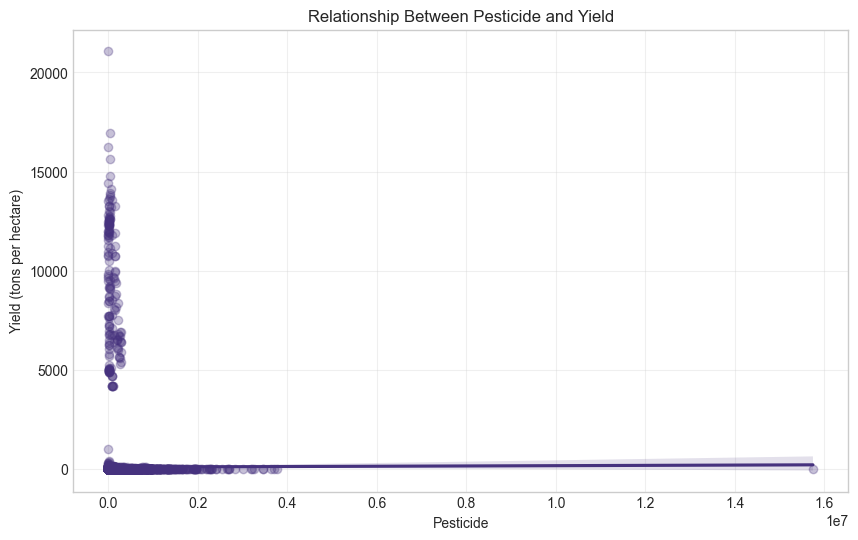

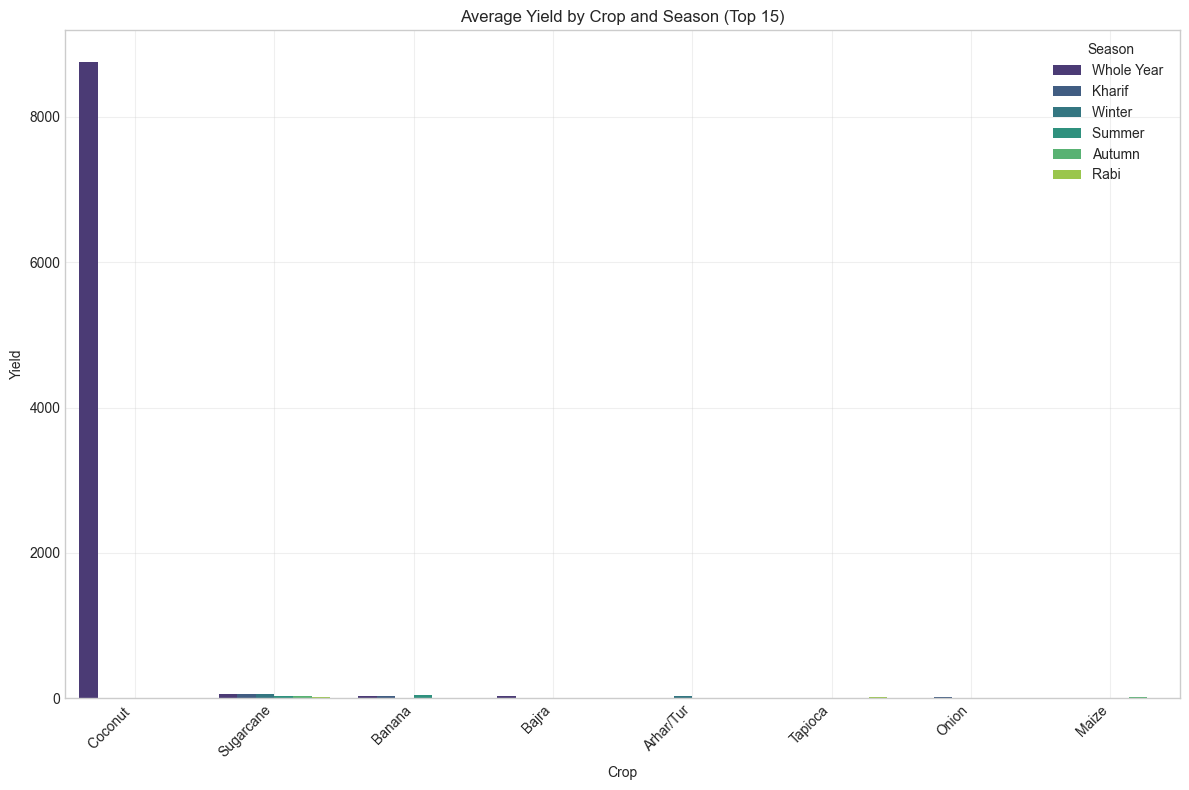


Top 20 Association Rules (by Lift):


/Users/sanjayyadav/Documents/learnings/hands-on/crops-yield-analysis/venv/lib/python3.10/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1609,"(Pesticide_bin_High, Annual_Rainfall_bin_Low, ...","(Fertilizer_bin_High, Season_Kharif )",0.146427,0.148052,0.073442,0.501561,3.387730,1.0,0.051763,1.709231,0.825726,0.332261,0.414942,0.498808
1697,"(Pesticide_bin_High, Annual_Rainfall_bin_Low, ...","(Fertilizer_bin_High, Annual_Rainfall, Season_...",0.146427,0.148052,0.073442,0.501561,3.387730,1.0,0.051763,1.709231,0.825726,0.332261,0.414942,0.498808
1689,"(Pesticide_bin_High, Annual_Rainfall_bin_Low, ...","(Fertilizer_bin_High, Season_Kharif )",0.146427,0.148052,0.073442,0.501561,3.387730,1.0,0.051763,1.709231,0.825726,0.332261,0.414942,0.498808
1607,"(Fertilizer_bin_High, Season_Kharif , Pest...","(Annual_Rainfall_bin_Low, Area_bin_High)",0.144243,0.151201,0.073442,0.509155,3.367401,1.0,0.051632,1.729260,0.821536,0.330817,0.421718,0.497439
1695,"(Fertilizer_bin_High, Season_Kharif , Pest...","(Annual_Rainfall_bin_Low, Area_bin_High, Annua...",0.144243,0.151201,0.073442,0.509155,3.367401,1.0,0.051632,1.729260,0.821536,0.330817,0.421718,0.497439
1686,"(Fertilizer_bin_High, Annual_Rainfall, Season_...","(Annual_Rainfall_bin_Low, Area_bin_High)",0.144243,0.151201,0.073442,0.509155,3.367401,1.0,0.051632,1.729260,0.821536,0.330817,0.421718,0.497439
1612,"(Pesticide_bin_High, Area_bin_High, Season_Kha...","(Fertilizer_bin_High, Annual_Rainfall_bin_Low)",0.144192,0.152014,0.073442,0.509334,3.350579,1.0,0.051523,1.728236,0.819745,0.329685,0.421375,0.496231
1700,"(Pesticide_bin_High, Area_bin_High, Season_Kha...","(Fertilizer_bin_High, Annual_Rainfall_bin_Low,...",0.144192,0.152014,0.073442,0.509334,3.350579,1.0,0.051523,1.728236,0.819745,0.329685,0.421375,0.496231
1693,"(Pesticide_bin_High, Area_bin_High, Annual_Rai...","(Fertilizer_bin_High, Annual_Rainfall_bin_Low)",0.144192,0.152014,0.073442,0.509334,3.350579,1.0,0.051523,1.728236,0.819745,0.329685,0.421375,0.496231
916,"(Fertilizer_bin_High, Season_Kharif )","(Annual_Rainfall_bin_Low, Area_bin_High)",0.148052,0.151201,0.074509,0.503259,3.328407,1.0,0.052123,1.708735,0.821125,0.331525,0.414772,0.498018


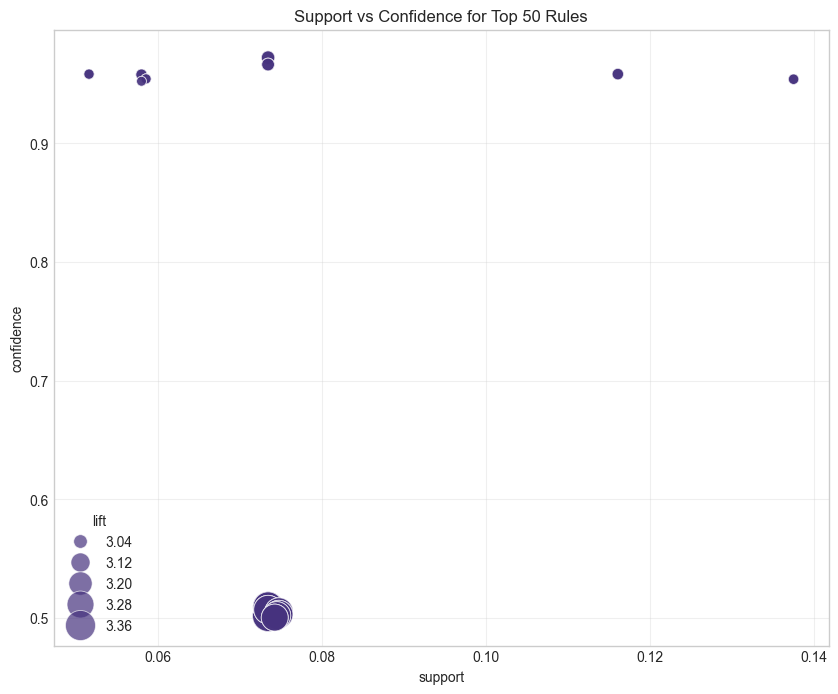

In [30]:
# Analyze the relationship between features and yield
for feature in ['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=feature, y='Yield', data=data, scatter_kws={'alpha':0.3})
    plt.title(f'Relationship Between {feature} and Yield')
    plt.xlabel(feature)
    plt.ylabel('Yield (tons per hectare)')
    plt.grid(True, alpha=0.3)
    plt.show()

# Analyze yield by crop and season
crop_season_yield = data.groupby(['Crop', 'Season'])['Yield'].mean().reset_index()
crop_season_yield = crop_season_yield.sort_values('Yield', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Crop', y='Yield', hue='Season', data=crop_season_yield)
plt.title('Average Yield by Crop and Season (Top 15)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Association Rule Mining
# First, we need to discretize the continuous variables
data_for_rules = data.copy()

# Discretize numerical columns
for col in ['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']:
    data_for_rules[col + '_bin'] = pd.qcut(data_for_rules[col], q=3, labels=['Low', 'Medium', 'High'])

# Create binary columns for association rules
def encode_features(df):
    for column in ['Crop', 'Season', 'State', 'Area_bin', 'Annual_Rainfall_bin', 'Fertilizer_bin', 'Pesticide_bin', 'Yield_bin']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
    return df

# Encode features
data_encoded = encode_features(data_for_rules)

# Select the binary columns
binary_cols = [col for col in data_encoded.columns if '_' in col and col not in 
              ['Crop_Year', 'Area_bin', 'Annual_Rainfall_bin', 'Fertilizer_bin', 'Pesticide_bin', 'Yield_bin']]

# Prepare the dataset for apriori algorithm
basket = data_encoded[binary_cols].astype(bool)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sort rules by lift
rules = rules.sort_values('lift', ascending=False)

# Display top 20 rules
print("\nTop 20 Association Rules (by Lift):")
display(rules.head(20))

# Visualize some of the top rules
plt.figure(figsize=(10, 8))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules.head(50), sizes=(50, 500), alpha=0.7)
plt.title('Support vs Confidence for Top 50 Rules')
plt.grid(True, alpha=0.3)
plt.show()

In [31]:
# Identify high-yield crops
high_yield_crops = data.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Crops by Average Yield:")
display(high_yield_crops)

# Identify optimal conditions for top 5 crops
top_5_crops = high_yield_crops.index[:5]
for crop in top_5_crops:
    crop_data = data[data['Crop'] == crop]
    print(f"\nOptimal Conditions for {crop}:")
    
    # Best season
    best_season = crop_data.groupby('Season')['Yield'].mean().sort_values(ascending=False)
    print(f"Best Season: {best_season.index[0]} (Average Yield: {best_season.iloc[0]:.2f})")
    
    # Best state
    best_state = crop_data.groupby('State')['Yield'].mean().sort_values(ascending=False)
    print(f"Best State: {best_state.index[0]} (Average Yield: {best_state.iloc[0]:.2f})")
    
    # Optimal rainfall
    optimal_rainfall = crop_data.loc[crop_data['Yield'].idxmax(), 'Annual_Rainfall']
    print(f"Optimal Annual Rainfall: {optimal_rainfall:.2f} mm")
    
    # Optimal fertilizer and pesticide usage
    optimal_fertilizer = crop_data.loc[crop_data['Yield'].idxmax(), 'Fertilizer']
    optimal_pesticide = crop_data.loc[crop_data['Yield'].idxmax(), 'Pesticide']
    print(f"Optimal Fertilizer Usage: {optimal_fertilizer:.2f} kg")
    print(f"Optimal Pesticide Usage: {optimal_pesticide:.2f} kg")

# Recommendations based on clusters
print("\nRecommendations Based on Farm Clusters:")
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    avg_yield = cluster_data['Yield'].mean()
    
    print(f"\nCluster {cluster} (Average Yield: {avg_yield:.2f}):")
    
    # Characteristics of this cluster
    print("Characteristics:")
    for feature in cluster_features:
        avg_value = cluster_data[feature].mean()
        print(f"  - Average {feature}: {avg_value:.2f}")
    
    # Best crops for this cluster
    best_crops = cluster_data.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(3)
    print("Recommended Crops:")
    for crop, yield_value in best_crops.items():
        print(f"  - {crop} (Expected Yield: {yield_value:.2f})")
    
    # Recommendations
    if cluster_data['Annual_Rainfall'].mean() > data['Annual_Rainfall'].mean():
        print("  - This cluster has high rainfall. Consider water-intensive crops.")
    else:
        print("  - This cluster has low rainfall. Consider drought-resistant crops.")
        
    if cluster_data['Fertilizer'].mean() > data['Fertilizer'].mean():
        print("  - Consider optimizing fertilizer usage for cost efficiency.")
    else:
        print("  - Consider increasing fertilizer usage for potentially higher yields.")


Top 10 Crops by Average Yield:


Crop
Coconut         8652.000199
Sugarcane         51.727439
Banana            26.851128
Tapioca           16.667301
Potato            13.331718
Onion             13.247525
Sweet potato       9.240788
Jute               7.555393
Ginger             6.442202
Mesta              5.389204
Name: Yield, dtype: float64


Optimal Conditions for Coconut :
Best Season: Whole Year  (Average Yield: 8753.77)
Best State: Telangana (Average Yield: 18679.50)
Optimal Annual Rainfall: 746.40 mm
Optimal Fertilizer Usage: 66271.44 kg
Optimal Pesticide Usage: 144.87 kg

Optimal Conditions for Sugarcane:
Best Season: Kharif      (Average Yield: 61.88)
Best State: Puducherry (Average Yield: 108.79)
Optimal Annual Rainfall: 1330.00 mm
Optimal Fertilizer Usage: 289994.16 kg
Optimal Pesticide Usage: 633.93 kg

Optimal Conditions for Banana:
Best Season: Summer      (Average Yield: 40.00)
Best State: Gujarat (Average Yield: 66.07)
Optimal Annual Rainfall: 1220.50 mm
Optimal Fertilizer Usage: 9585695.60 kg
Optimal Pesticide Usage: 20684.30 kg

Optimal Conditions for Tapioca:
Best Season: Rabi        (Average Yield: 19.38)
Best State: Tamil Nadu (Average Yield: 35.92)
Optimal Annual Rainfall: 1067.20 mm
Optimal Fertilizer Usage: 18688272.80 kg
Optimal Pesticide Usage: 22414.72 kg

Optimal Conditions for Potato:
Best Season

In [32]:
print("\n=== SUMMARY OF FINDINGS ===\n")

print("Key Factors Affecting Crop Yield:")
# Display correlations with yield again
print(yield_correlations)

print("\nFarm Clusters:")
# Display cluster characteristics
display(cluster_stats)

print("\nTop Performing Crops:")
# Display top crops by yield
display(high_yield_crops)

print("\nRecommendations:")
print("1. Crop Selection:")
print("   - Choose crops suitable for your region's rainfall patterns.")
print("   - Consider seasonal variations in crop performance.")

print("\n2. Resource Optimization:")
print("   - Adjust fertilizer and pesticide usage based on crop requirements.")
print("   - Balance area under cultivation with resource availability.")

print("\n3. Cluster-Specific Recommendations:")
for cluster in range(optimal_k):
    print(f"   - Cluster {cluster}: {cluster_stats.loc[cluster, 'Yield']:.2f} average yield")

print("\nLimitations of Analysis:")
print("1. This analysis does not account for soil quality or type.")
print("2. Weather variations beyond annual rainfall are not considered.")
print("3. Market forces affecting crop selection are not included.")
print("4. The analysis assumes current agricultural practices and technologies.")


=== SUMMARY OF FINDINGS ===

Key Factors Affecting Crop Yield:
Yield              1.000000
Production         0.570809
Annual_Rainfall    0.020761
Fertilizer         0.002862
Crop_Year          0.002539
Area               0.001858
Pesticide          0.001782
Name: Yield, dtype: float64

Farm Clusters:


,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield
Cluster,,,,,
0,3.661831e+06,1019.821768,5.026495e+08,1.011617e+06,3.916256
1,2.839014e+04,2911.807169,3.682701e+06,7.638002e+03,115.849695
2,5.080810e+07,1852.900000,4.835407e+09,1.575051e+07,0.698889
3,1.124281e+05,1154.787906,1.487912e+07,2.994065e+04,74.858168



Top Performing Crops:


Crop
Coconut         8652.000199
Sugarcane         51.727439
Banana            26.851128
Tapioca           16.667301
Potato            13.331718
Onion             13.247525
Sweet potato       9.240788
Jute               7.555393
Ginger             6.442202
Mesta              5.389204
Name: Yield, dtype: float64


Recommendations:
1. Crop Selection:
   - Choose crops suitable for your region's rainfall patterns.
   - Consider seasonal variations in crop performance.

2. Resource Optimization:
   - Adjust fertilizer and pesticide usage based on crop requirements.
   - Balance area under cultivation with resource availability.

3. Cluster-Specific Recommendations:
   - Cluster 0: 3.92 average yield
   - Cluster 1: 115.85 average yield
   - Cluster 2: 0.70 average yield
   - Cluster 3: 74.86 average yield

Limitations of Analysis:
1. This analysis does not account for soil quality or type.
2. Weather variations beyond annual rainfall are not considered.
3. Market forces affecting crop selection are not included.
4. The analysis assumes current agricultural practices and technologies.
